<a href="https://colab.research.google.com/github/MatheusMataBIO/Projetos-de-ciencias-de-dados-/blob/main/Treinamento_rede_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de treinamento usando a rede YOLO**

Autor: Matheus Mata


In [1]:
# Importando o drive library para utilizar o Google drive como drive local, assim podendo acessar seu arquivo no drive

%cd ..

from google.colab import drive
drive.mount('/content/gdrive')


/
Mounted at /content/gdrive


In [2]:
# verificando a versão do compilador NVIDIA CUDA C (nvcc) instalado no sistema

!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [3]:
# verificando os arquivos e diretórios no atual diretório

!ln -s /content/gdrive/My\ Drive/ /mydrive


In [4]:
# cria pastas no diretório

!mkdir /mydrive/yolov4/

In [5]:
%cd /mydrive/yolov4

/content/gdrive/My Drive/yolov4


In [6]:
# clona algum repositório no Github

!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15833, done.
remote: Total 15833 (delta 0), reused 0 (delta 0), pack-reused 15833
Receiving objects: 100% (15833/15833), 14.39 MiB | 12.62 MiB/s, done.
Resolving deltas: 100% (10666/10666), done.
Updating files: 100% (2056/2056), done.


In [7]:
!mkdir /mydrive/yolov4/training

In [8]:
# Instalando o CocoDataset para utilizar os datasets incluídos nele

!pip install CocoDataset

In [9]:
# Download dos datasets para treinamento e descompactando o arquivo zip

!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!unzip annotations_trainval2014.zip

--2024-01-04 03:32:20--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.20.209, 3.5.21.127, 54.231.163.145, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.20.209|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  47.2MB/s    in 4.7s    

2024-01-04 03:32:25 (51.4 MB/s) - ‘annotations_trainval2014.zip’ saved [252872794/252872794]

Archive:  annotations_trainval2014.zip
  inflating: annotations/instances_train2014.json  
  inflating: annotations/instances_val2014.json  
  inflating: annotations/person_keypoints_train2014.json  
  inflating: annotations/person_keypoints_val2014.json  
  inflating: annotations/captions_train2014.json  
  inflating: annotations/captions_val2014.json  


In [10]:
# Escolher 2 classes e suas variáveis para o treinamento 2 classes (person e car)

from coco_dataset import coco_dataset_download as cocod

class_name = "person"
images_count = 30
annotations_path = '/content/gdrive/MyDrive/yolov4/annotations/instances_train2014.json'

cocod.coco_dataset_download(class_name, images_count, annotations_path)

loading annotations into memory...
Done (t=9.06s)
creating index...
index created!
no.of image: 1
no.of image: 2
no.of image: 3
no.of image: 4
no.of image: 5
no.of image: 6
no.of image: 7
no.of image: 8
no.of image: 9
no.of image: 10
no.of image: 11
no.of image: 12
no.of image: 13
no.of image: 14
no.of image: 15
no.of image: 16
no.of image: 17
no.of image: 18
no.of image: 19
no.of image: 20
no.of image: 21
no.of image: 22
no.of image: 23
no.of image: 24
no.of image: 25
no.of image: 26
no.of image: 27
no.of image: 28
no.of image: 29
no.of image: 30
finished images download


In [11]:
# removendo o diretório vazio depois da descompactação

!rm -r annotations_trainval2014.zip

In [12]:
!mkdir darknet/data/obj

In [13]:
!mv person/*.jpg darknet/data/obj/

In [14]:
!rm -r person

In [15]:
class_name = "car"
images_count = 50
annotations_path = '/content/gdrive/MyDrive/yolov4/annotations/instances_train2014.json'

cocod.coco_dataset_download(class_name, images_count, annotations_path)

loading annotations into memory...
Done (t=9.46s)
creating index...
index created!
no.of image: 1
no.of image: 2
no.of image: 3
no.of image: 4
no.of image: 5
no.of image: 6
no.of image: 7
no.of image: 8
no.of image: 9
no.of image: 10
no.of image: 11
no.of image: 12
no.of image: 13
no.of image: 14
no.of image: 15
no.of image: 16
no.of image: 17
no.of image: 18
no.of image: 19
no.of image: 20
no.of image: 21
no.of image: 22
no.of image: 23
no.of image: 24
no.of image: 25
no.of image: 26
no.of image: 27
no.of image: 28
no.of image: 29
no.of image: 30
no.of image: 31
no.of image: 32
no.of image: 33
no.of image: 34
no.of image: 35
no.of image: 36
no.of image: 37
no.of image: 38
no.of image: 39
no.of image: 40
no.of image: 41
no.of image: 42
no.of image: 43
no.of image: 44
no.of image: 45
no.of image: 46
no.of image: 47
no.of image: 48
no.of image: 49
no.of image: 50
finished images download


In [16]:
!mv car/*jpg darknet/data/obj

In [17]:
!rm -r car

In [18]:
%cd darknet

/content/gdrive/MyDrive/yolov4/darknet


In [19]:
# Download dos pesos para treinamento


!wget https://pjreddie.com/media/files/yolov3.weights

--2024-01-04 03:34:53--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  6.69MB/s    in 57s     

2024-01-04 03:35:51 (4.16 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [20]:
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:253:21: warning: unused variable ‘n’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-variable-Wunused-variable]8;;]
  253 |                 int n = _write(client, outputbuf, outlen);
      |                     ^
./src/http_stream.cpp: In function ‘void set_track_id(detection*, int, float, float, float, int, int, int)’:
./src/http_stream.cpp:866:27: warning: comparison of integer expressions of different signedness: 

In [21]:
# Função para que possa ser visualizado a imagem

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [22]:
!ls

3rdparty	darknet			Dockerfile.cpu	       Makefile       scripts
backup		DarknetConfig.cmake.in	Dockerfile.gpu	       net_cam_v3.sh  src
build		darknet_images.py	image_yolov3.sh        net_cam_v4.sh  vcpkg.json
build.ps1	darknet.py		image_yolov4.sh        obj	      vcpkg.json.opencv23
cfg		darknet_video.py	include		       package.xml    video_yolov3.sh
cmake		data			json_mjpeg_streams.sh  README.md      video_yolov4.sh
CMakeLists.txt	docker-compose.yml	LICENSE		       results	      yolov3.weights


 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128  

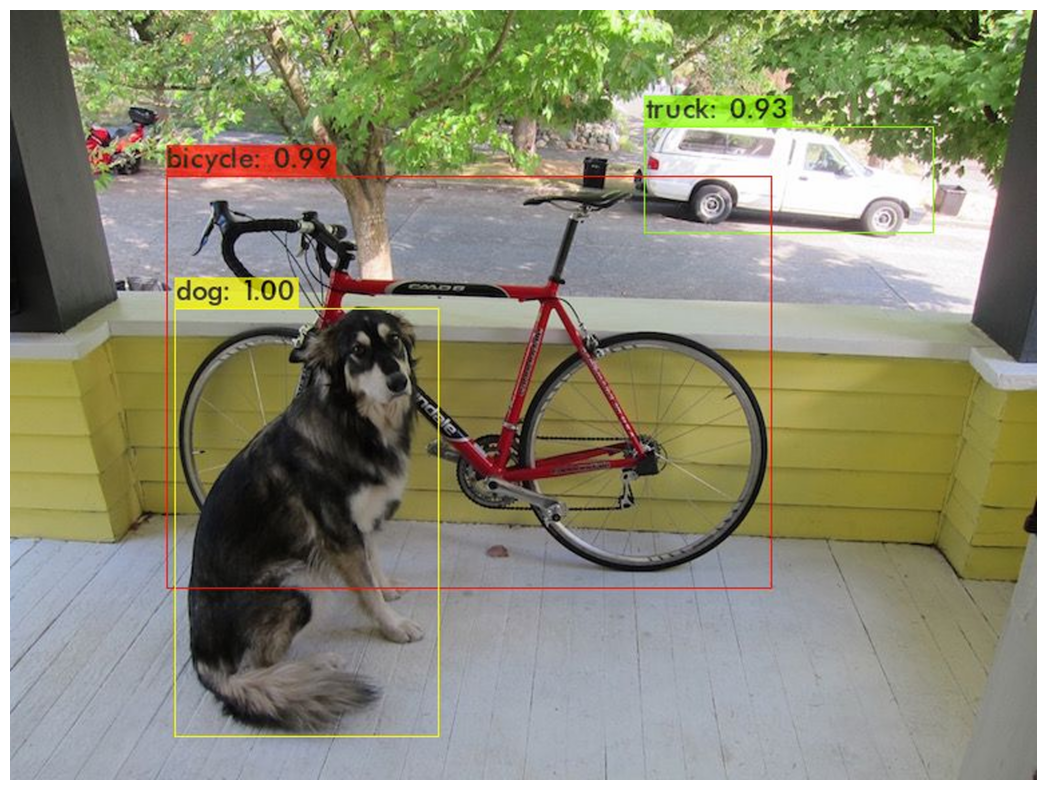

In [23]:
# utilizado para realizar a detecção de objetos em uma imagem usando o modelo YOLOv3

!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

imShow('predictions.jpg')
